# 1. t-J Model

-----

## 1. t-J Hamiltonian

### a. Basis

The $t-J$ Hamiltonian with a S=1/2 spin-model is constructed in a basis of $\mathcal{R}^3$ given by the vector B as follows:

$$
B=
  \begin{bmatrix}
     0 \\
     \uparrow \\
     \downarrow
  \end{bmatrix}
$$

### b.) Operators

The Hamiltonian is constructed using two types of operators.

1. The particle creation and annihilation operators $\hat{C}^\dagger,\hat{C}$
2. The spin ladder operators $\hat{S}^+, \hat{S}^-, \hat{S}^z$

The matrix form of the five operators in the above basis is given as follows:

$$
\hat{C}^{\dagger}_{\uparrow}= \left( \hat{C}_{\uparrow} \right)^\dagger=
  \begin{bmatrix}
     0 & 0 & 0 \\
     1 & 0 & 0 \\
     0 & 0 & 0
  \end{bmatrix}
$$

$$
\hat{C}^{\dagger}_{\downarrow}= \left( \hat{C}_{\downarrow} \right)^\dagger=
  \begin{bmatrix}
     0 & 0 & 0 \\
     0 & 0 & 0 \\
     1 & 0 & 0
  \end{bmatrix}
$$

$$
\hat{S}^{z}\ \ \ \  =\ \ \ \ \ 
  \begin{bmatrix}
     0 & 0 & 0 \\
     0 & \frac{1}{2} & 0 \\
     0 & 0 & -\frac{1}{2}
  \end{bmatrix}
$$

$$
\hat{S}^{+}_{\downarrow}= \left( \hat{S}^- \right)^\dagger=
  \begin{bmatrix}
     0 & 0 & 0 \\
     0 & 0 & 0 \\
     0 & 1 & 0
  \end{bmatrix}
$$


### c.) Hamiltonian 

**Nearest Neighbor coupling**

The $t-J$ Hamiltonian is written in the above basis with the above five operators and the two parameters $t$ which governs the kinetic energy of the particles and the magnetic-coupling parameter $J$ which governs the coupling of the localized spins on neighboring sites.


$$
\hat{H_{t-J}} = \sum^{N-1}_i \left\{ t_{i,i+1} \sum_{\sigma} \left(\hat{C}^{\dagger}_{\sigma,i}\cdot\hat{C}_{\sigma,i+1} + h.c. \right) + J_{i,i+1} \left( \frac{\hat{S}^+_{i}\cdot\hat{S}^-_{i+1} + \hat{S}^-_{i}\cdot\hat{S}^+_{i+1}}{2} + \hat{S}^z_i\cdot\hat{S}^z_{i+1} \right)\right\}
$$

$h.c.$ stands for Hermitian conjugate.

# 2. 2D Lattice

----

## 1.) Labeling
Here a 4x4 lattice is shown with periodic boundary conditions where each site and bond is labelled.

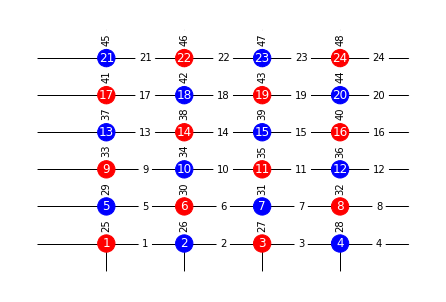

In [128]:
import matplotlib as mplt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Lx = 4
Ly = 6
#fig = plt.figure()
#draw2DLattice(Lx,Ly,fig)
draw2DLattice(Lx,Ly)
#fig.savefig("/tmp/graph.png",dpi=1000)

## 2.) Generating input file 

In this work, we will be using the [DEHam](https://github.com/v1j4y/DEHam) code to solve the Hamiltonian using Exact Diagonalization method. 

The input file for the code is as follows:



  1. The DEHam program requires an input file which 
   has the topology of the Hamiltonian and the various parameters
   as explained below in a sample inputfile:

```python
8     								# The number of orbitals (total)
1     								# The largest number of non-zero elements per row (Multiple of Ndet)
1     								# The total number of processors used in parallel (Multiple of Ndet)
1     								# The number of holes
0     								# The isz (ms-1/2) value
true     	# Restrict the hole to the 1'st (i.e. half of natom) Family of states. *false* for no restrictions
1,2,3,1,2,3,4,5,6,7					# (L1) The topology of the system is specified here
2,3,4,8,7,6,5,6,7,8					# (L2) first and second line contain the two sites linked
1,1,1,2,2,2,2,3,3,3					# (ltype) third line contains the type of link (1 for t or J, 2 for K and 3 for none)
.1430,-0.20,0.0000					# The three types of links this line gives Jz, Kz
.1430,-0.20,0.0000					# The three types of links this line gives Jx,y; Kx,y
-1.00,0.0,0.00						# This line gives t(i,i+1), t(i,i+2), t(i,i+3)
0.,0.,0.,0.,0.,0.,0.,0.,0. 		    # Energy of each orbital + additional energy
2                   				# The total number of roots
1                   				# I   The position of the first
1                   				# I   SBox
1                   				# I
1                   				# I
1                   				# II  The positions of the second
1                   				# II  SBox
1                   				# II
1                   				# II
1                   				# III
1                   				# III The positions of the third
1                   				# III SBox
1                   				# III
1                   				# positio of the hole
0                   				# fix the position of the first hole during the CI
0                   				# fix the position of the second hole during the CI
0                   				# Print the wavefunction. It is stored in the FIL666 file after the run
```


### a.) Script for $t-J$ input file

In [130]:
l1, l2, ltype = getInput(Lx,Ly)
print(l1)
print(l2)
print(ltype)
print(len(l1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[2, 3, 4, 1, 6, 7, 8, 5, 10, 11, 12, 9, 14, 15, 16, 13, 18, 19, 20, 17, 22, 23, 24, 21, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
48


------

# 3.) Misc

## 1. Draw Lattice

In [2]:
"""
Function that draws a 2D Lattice
"""
def draw2DLattice(Lx,Ly):
    n=Lx+2
    m=Ly+2

    G = nx.grid_2d_graph(n,m)  # Lx, Ly grid

    pos = dict( (n, n) for n in G.nodes() );
    #labels = Dict( ((i, j), i + (Ly-j) * (Lx+1) ) for (i,j) in G.nodes() );
    #edges=Dict()
    #for (i,edge) in enumerate(G.edges)
    #    edges[edge]=i
    #    print(i,"\t",edge,"\n")
    #end


    for j in range(0,m-1):
        G.remove_edge((0,j),(0,j+1))
        G.remove_edge((n-1,j),(n-1,j+1))

    for i in range(0,n-1):
        G.remove_edge((i,0),(i+1,0))
        G.remove_edge((i,m-1),(i+1,m-1))



    edgescenter = dict()
    countedge = 1
    for j in range(1,m-1):
        for i in range(1,n-1):
            edgescenter[((i,j),(i+1,j))] = countedge
            countedge += 1


    for j in range(1,m-1):
        for i in range(1,n-1):
            edgescenter[((i,j),(i,j+1))] = countedge
            countedge += 1


    labelscenter = dict()
    countlabels = 1
    for j in range(1,m-1):
        for i in range(1,n-1):
            labelscenter[(i,j)]=countlabels
            countlabels+=1


    color_map=[]
    countcolor=0
    for i in range(0,n):
        for j in range(0,m):
            if i==0 or j==0 or i==n-1 or j==m-1:
                color_map.append("white")
            else:
                if(countcolor%2 == 0):
                    color_map.append("blue")
                else:
                    color_map.append("red")
                countcolor+=1
        countcolor+=1


#    nx.draw(G, pos=pos, labels=labelscenter, node_color=color_map, font_color="white", ax=fig.add_subplot(111));
#    nx.draw_networkx_edge_labels(G,pos,edge_labels=edgescenter,font_color="black", ax=fig.add_subplot(111));
    nx.draw(G, pos=pos, labels=labelscenter, node_color=color_map, font_color="white");
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edgescenter,font_color="black");


## 2. Generate Input

In [116]:
"""
Function that generates the input
"""
def getInput(Lx,Ly):
    n=Lx+2
    m=Ly+2


    labelscenter = dict()
    countlabels = 1
    for j in range(1,m-1):
        for i in range(1,n-1):
            labelscenter[(i,j)]=countlabels
            countlabels+=1
#     print(labelscenter)
    edgescenter = dict()
    countedge = 1
    for j in range(1,m-1):
        for i in range(1,n-1):
            edgescenter[((i,j),(i+1,j))] = countedge
            countedge += 1
    for j in range(1,m-1):
        for i in range(1,n-1):
            edgescenter[((i,j),(i,j+1))] = countedge
            countedge += 1

#     print(edgescenter)
    l1 = []
    l2 = []
    itype = [1 for x in range(0,len(edgescenter))]
     
    for x in edgescenter:
#         print(x[0],"\t",x[1])
#         print(l1)
#         print(l2)
        if Lx + 1 not in x[1] or Ly + 1 not in x[1]:
#             print("-->",x[1])
            l1.append(labelscenter[x[0]])
#             l2.append(labelscenter[x[1]])
            if x[1][0] > Lx and x[1][1] <= Ly:
                l2.append(labelscenter[(x[1][0]-Lx,x[1][1])])
            elif x[1][0] <= Lx and x[1][1] > Ly:
                l2.append(labelscenter[(x[1][0],x[1][1]-Ly)])
            elif x[1][0] > Lx and x[1][1] > Ly:
                l2.append(labelscenter[(x[1][0]-Lx,x[1][1]-Ly)])
            else:
                l2.append(labelscenter[x[1]])
        else:
            l1.append(labelscenter[x[0]])
            if x[1][0] > Lx:
                l2.append(labelscenter[(x[1][0]-Lx,x[1][1])])
            elif x[1][1] > Ly:
                l2.append(labelscenter[(x[1][0],x[1][1]-Ly)])

#    print(l1,"\n")
#    print(l2,"\n")
#    print(itype,"\n")
    return l1,l2,itype

In [117]:
getInput(2,3)

([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6],
 [2, 1, 4, 3, 6, 5, 3, 4, 5, 6, 1, 2],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

header=r"""

"""